# SoftKMeans
Using Python and Numpy, write a class named SoftKMeans with necessary methods, which implements the soft K-means method for clustering.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
class SoftKMeans:
    def __init__(self,k,max_iter,beta=0.01):
        self.beta=beta
        self.k=k
        self.max_iter=max_iter
        
    def init_center(self, X):
        n, _ = X.shape
        center = np.zeros((self.k, X.shape[1]))
        idx = np.random.choice(n)
        center[0] = X[idx]
        for i in range(1, self.k):
            D = np.min([np.linalg.norm(X - c, axis=1)**2 for c in center[:i]], axis=0)
            probs = D / np.sum(D)
            idx = np.random.choice(n, p=probs)
            center[i] = X[idx]
        return center
        
    def train(self,X,plot=False):
        losses=[]
        n,_=X.shape
        self.center=self.init_center(X)
        for _ in range (self.max_iter):
            last_center=self.center
            self.r=np.zeros([n,self.k])
            for j in range(n):
                self.cluster(self.r[j],X[j])
            self.move_center(self.r,X)
            losses.append(self.loss(X))
            print('Iteration: ',_,'loss: ', self.loss(X))
            if np.sum((last_center-self.center)**2)==0:
                break
        self.labels=np.argmax(self.r,axis=1)
        if plot:
            self.plot_cluster(X)
        iter=np.arange(len(losses))
        plt.plot(iter,losses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        title='Loss Curve, k= '+str(self.k)
        plt.title(title)
        plt.grid()
        plt.show()
        
        
    def distance(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    
    def cluster(self,r,x):
        dis=np.empty(self.k)
        for i in range(self.k):
            dis[i]=self.distance(x,self.center[i])
        den=np.sum(np.exp(-self.beta*dis))
        for i in range(self.k):
            r[i]=np.exp(-self.beta*dis[i])/den
    
    def move_center(self,r,X):
        self.center=np.dot(r.T,X)/np.sum(r,axis=0).reshape(-1,1)
        
    def plot_cluster(self, X):
        colors = ['orange', 'blue', 'green', 'red', 'purple', 'yellow', 'brown', 'pink', 'gray', 'olive'] 
        for i in range(self.k):
            plt.scatter(X[self.labels == i, 0], X[self.labels == i, 2], c=colors[i], label='Cluster {}'.format(i))
        plt.scatter(self.center[:,0], self.center[:,2], c='black', marker='x', label='Centroids')
        plt.legend()
        plt.show()
    
    def loss(self,X):
        n=X.shape[0]
        loss=0
        for i in range(n):
            for j in range(self.k):
                loss+=self.r[i,j]*self.distance(X[i],self.center[j])
        return loss

Iteration:  0 loss:  326.37926411720946
Iteration:  1 loss:  317.76387545943044
Iteration:  2 loss:  315.69956547490403
Iteration:  3 loss:  314.32854708518425
Iteration:  4 loss:  313.9451963452129
Iteration:  5 loss:  313.82684176381485
Iteration:  6 loss:  313.74850810994
Iteration:  7 loss:  313.67868480479257
Iteration:  8 loss:  313.61098003062875
Iteration:  9 loss:  313.54964091859887
Iteration:  10 loss:  313.50387969411094
Iteration:  11 loss:  313.47756115293674
Iteration:  12 loss:  313.46571197196533
Iteration:  13 loss:  313.46124643044385
Iteration:  14 loss:  313.4597381251674
Iteration:  15 loss:  313.4592606954955
Iteration:  16 loss:  313.4591160343371
Iteration:  17 loss:  313.4590739486345
Iteration:  18 loss:  313.459062387143
Iteration:  19 loss:  313.45905955499575
Iteration:  20 loss:  313.45905906098204
Iteration:  21 loss:  313.4590591080573
Iteration:  22 loss:  313.4590592289482
Iteration:  23 loss:  313.45905932354805
Iteration:  24 loss:  313.459059383801

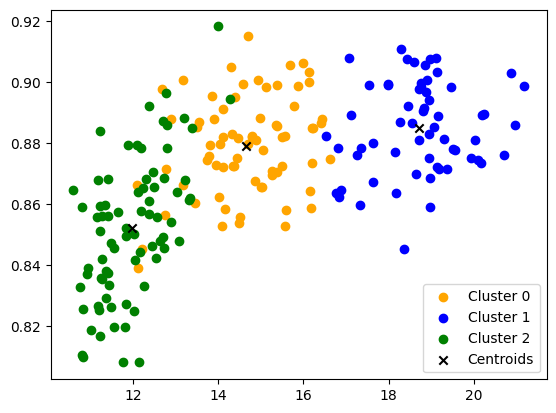

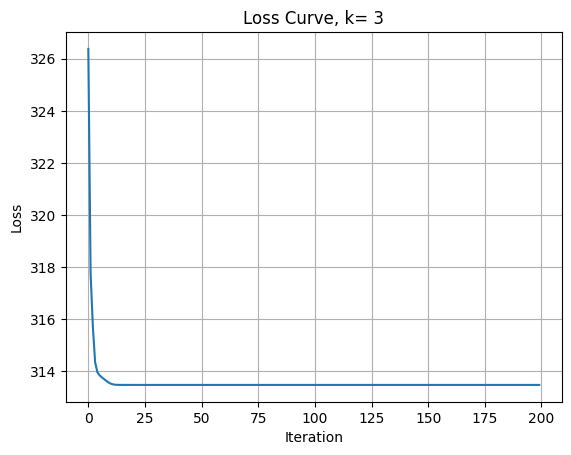

accuracy:
0.7166198557361053


In [127]:
seeds=np.loadtxt('seeds_dataset.txt')
seeds_input=seeds[:,:-1]
seeds_label=seeds[:,-1]
k=SoftKMeans(k=3,max_iter=200,beta=10)
k.train(seeds_input,True)
from sklearn.metrics import adjusted_rand_score
print('accuracy:')
print(adjusted_rand_score(seeds_label, k.labels))

Iteration:  0 loss:  5549202.287075334
Iteration:  1 loss:  5406714.137322052
Iteration:  2 loss:  5326480.513109451
Iteration:  3 loss:  5252809.504380772
Iteration:  4 loss:  5185988.184481968
Iteration:  5 loss:  5109845.397425344
Iteration:  6 loss:  5044232.038026418
Iteration:  7 loss:  4993142.40397927
Iteration:  8 loss:  4966860.876040315
Iteration:  9 loss:  4956213.965842436
Iteration:  10 loss:  4952634.326019494
Iteration:  11 loss:  4953859.694537643
Iteration:  12 loss:  4955041.911643831
Iteration:  13 loss:  4958078.275069814
Iteration:  14 loss:  4963174.7251286125
Iteration:  15 loss:  4967348.944866609
Iteration:  16 loss:  4971951.526451208
Iteration:  17 loss:  4975980.798596942
Iteration:  18 loss:  4978524.246984179
Iteration:  19 loss:  4980198.176665767
Iteration:  20 loss:  4981268.345258163
Iteration:  21 loss:  4982498.0553922765
Iteration:  22 loss:  4983562.725043234
Iteration:  23 loss:  4983805.858037622
Iteration:  24 loss:  4983984.300575602
Iteration

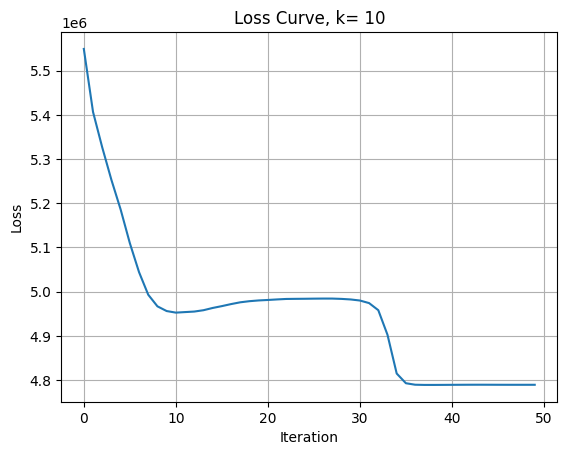

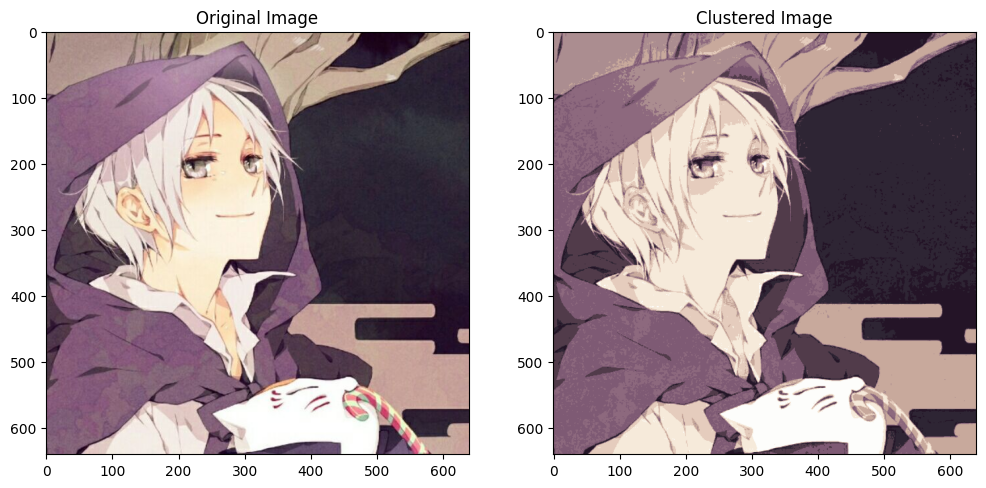

In [91]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image=Image.open('p1.jpg')
image=np.array(image)
height, width, channels = image.shape
flattened_image = image.reshape((height * width, channels))
k = 10  # Set your desired number of clusters
max_iter = 50
soft_kmeans = SoftKMeans(k=k, max_iter=max_iter, beta=6.5)

# Train SoftKMeans on the flattened image
soft_kmeans.train(flattened_image, plot=False)
clustered_image=[]
for i in range(soft_kmeans.labels.shape[0]):
    clustered_image.append(soft_kmeans.center[soft_kmeans.labels[i]])
clustered_image=np.array(clustered_image)
clustered_image=clustered_image.reshape((height,width,channels))
clustered_image=clustered_image.astype(np.uint8)
# Visualize the original image and clustered image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

# Clustered Image
plt.subplot(1, 2, 2)
plt.imshow(clustered_image, cmap='gray')  # Choose a colormap that suits your needs
plt.title("Clustered Image, k=10")

plt.show() 


Add non-local split-and-merge moves

Iteration:  0 loss:  300.6486521743501
Iteration:  1 loss:  318.98913166189624
Iteration:  2 loss:  314.50931619143626
Iteration:  3 loss:  314.4183884791277
Iteration:  4 loss:  314.3890364896465
Iteration:  5 loss:  314.37278495835756
Iteration:  6 loss:  314.36404475538086
Iteration:  7 loss:  314.3595435475004
Iteration:  8 loss:  314.3572446618942
Iteration:  9 loss:  314.35605300407843
Iteration:  10 loss:  314.3554178888741
Iteration:  11 loss:  314.35506752940097
Iteration:  12 loss:  314.3548669919087
Iteration:  13 loss:  314.3547479863132
Iteration:  14 loss:  314.35467499688207
Iteration:  15 loss:  314.35462894387615
Iteration:  16 loss:  314.3545992066891
Iteration:  17 loss:  314.3545796542799
Iteration:  18 loss:  314.3545666212085
Iteration:  19 loss:  314.3545578455734
Iteration:  20 loss:  314.3545518932919
Iteration:  21 loss:  314.3545478349132
Iteration:  22 loss:  314.35454505762135
Iteration:  23 loss:  314.35454315210603
Iteration:  24 loss:  314.35454184236005

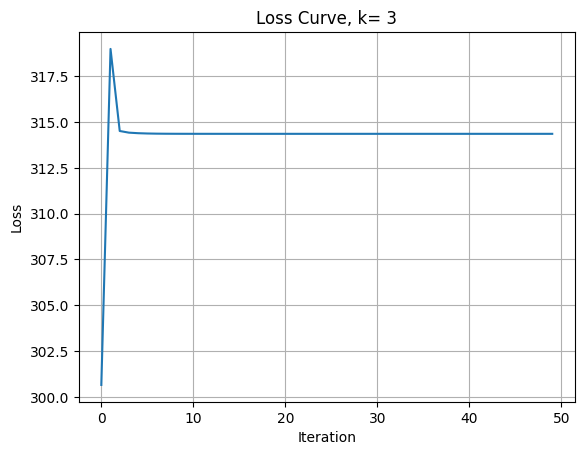

accuracy:
0.7166198557361053


In [168]:
import numpy as np
import matplotlib.pyplot as plt
# Modify the algorithm by adding non-local split-and-merge moves
class NLSM_SoftKMeans:
    def __init__(self,k,max_iter,beta=0.01,split_threshold=1,merge_threshold=1):
        self.beta=beta
        self.k=k
        self.max_iter=max_iter
        self.split_threshold=split_threshold
        self.merge_threshold=merge_threshold
        
    def init_center(self, X, k):
        n, _ = X.shape
        center = np.zeros((k, X.shape[1]))
        idx = np.random.choice(n)
        center[0] = X[idx]
        for i in range(1, k):
            D = np.min([np.linalg.norm(X - c, axis=1)**2 for c in center[:i]], axis=0)
            probs = D / np.sum(D)
            idx = np.random.choice(n, p=probs)
            center[i] = X[idx]
        return center
        
    def train(self,X,plot=False):
        losses=[]
        n,_=X.shape
        self.center=self.init_center(X,self.k)
        for _ in range (self.max_iter):
            last_center=self.center
            self.r=np.zeros([n,self.k])
            for j in range(n):
                self.cluster(self.r[j],X[j])
            self.move_center(self.r,X)
            self.labels=np.argmax(self.r,axis=1)
            self.split(X)
            self.merge(X)
            losses.append(self.loss(X))
            print('Iteration: ',_,'loss: ', self.loss(X))
            if last_center.shape==self.center.shape:
                if np.sum((last_center-self.center)**2)==0:
                    break
        if plot:
            self.plot_cluster(X)
        iter=np.arange(len(losses))
        plt.plot(iter,losses)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        title='Loss Curve, k= '+str(self.k)
        plt.title(title)
        plt.grid()
        plt.show()
    
    def split(self,X):
        n=X.shape[0]
        i=0
        while i < self.k:
            clstX=X[self.labels==i]
            sum_var=np.sum(np.var(clstX,axis=0))
            if sum_var>self.split_threshold:
                self.k+=1
                center=self.init_center(clstX,2)
                self.center=np.delete(self.center,i,axis=0)
                self.center=np.insert(self.center,i,center,axis=0)
                for _ in range(self.max_iter):
                    last_center=self.center
                    self.r=np.zeros([n,self.k])
                    for j in range(n):
                        self.cluster(self.r[j],X[j])
                    self.move_center(self.r,X)
                    self.labels=np.argmax(self.r,axis=1)
                    if np.sum((last_center-self.center)**2)==0:
                        break
                i+=1
            i+=1
    
    def merge(self,X):
        n=X.shape[0]
        i=0
        while i < self.k:
            clustX1=X[self.labels==i]
            j=i+1
            while j < self.k:
                if self.distance(self.center[i],self.center[j])<self.merge_threshold:
                    clustX2=X[self.labels==j]
                    self.k-=1
                    clustX1=np.concatenate((clustX1,clustX2),axis=0)
                    center=np.mean(clustX1,axis=0)
                    self.center=np.delete(self.center,j,axis=0)
                    self.center=np.delete(self.center,i,axis=0)
                    self.center=np.insert(self.center,i,center,axis=0)
                    for k in range(n):
                        if j==np.argmax(self.r[k]):
                            self.r[k,i]=1
                    self.r=np.delete(self.r,j,axis=1)
                    self.labels=np.argmax(self.r,axis=1)
                    j-=1
                j+=1
            i+=1
        
    def distance(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    
    def cluster(self,r,x):
        dis=np.empty(self.k)
        for i in range(self.k):
            dis[i]=self.distance(x,self.center[i])
        den=np.sum(np.exp(-self.beta*dis))
        for i in range(self.k):
            r[i]=np.exp(-self.beta*dis[i])/den
    
    def move_center(self,r,X):
        self.center=np.dot(r.T,X)/np.sum(r,axis=0).reshape(-1,1)
        
    def plot_cluster(self, X):
        colors = ['orange', 'blue', 'green', 'red', 'purple', 'yellow', 'brown', 'pink', 'gray', 'olive'] 
        for i in range(self.k):
            plt.scatter(X[self.labels == i, 0], X[self.labels == i, 1], c=colors[i], label='Cluster {}'.format(i))
        plt.scatter(self.center[:,0], self.center[:,1], c='black', marker='x', label='Centroids')
        plt.legend()
        plt.show()
    
    def loss(self,X):
        n=X.shape[0]
        loss=0
        for i in range(n):
            for j in range(self.k):
                loss+=self.r[i,j]*self.distance(X[i],self.center[j])
        return loss
# Test the NLSM_SoftKMeans algorithm
seeds=np.loadtxt('seeds_dataset.txt')
seeds_input=seeds[:,:-1]
seeds_label=seeds[:,-1]
k=NLSM_SoftKMeans(k=10,max_iter=50,beta=5,split_threshold=4,merge_threshold=3)
k.train(seeds_input)
from sklearn.metrics import adjusted_rand_score
print('accuracy:')
print(adjusted_rand_score(seeds_label, k.labels))